# Classification Algorithm
***Task is to predict whether a person has heart disease or not using Logistic regression, Decision classifier, KNN and Naive bayes***

In this tutorial we will cover: <br>
1)Understanding the data and its attributes .<br>
2)Visualization of the data.<br>
3)Fixing the missing values if any.<br>
4)Finding correlated attritbutes. <br>
5)Create train and test test set to generate accuracy of the model.

# Data Details
This dataset contains information about contains diagnoses of heart disease patients. It contains 76 attributes, including the predicted attribute. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


# Understanding and visualizing the data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Shape of data
df.shape
#the dataset contains 59 pieces of fruit with seven features.

(1025, 14)

In [5]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Check the type of feature and  the missing values

In [6]:
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]

for features in features_with_nan:
    print(features , np.round(df[features].isnull().mean(),4) , '% missing values')

print(len(features_with_nan)) 

0


In [7]:
# numerical features
numerical_features=[features for features in df.columns if df[features].dtype!='O']

print('Number of numerical features' , len(numerical_features))
print(numerical_features)

Number of numerical features 14
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [8]:
# discrete features

discrete_features = [features for features in numerical_features if len(df[features].unique())<=10 and features not in ['encounter_id','patient_id']]

print('discrete features', len(discrete_features))
print(discrete_features)

discrete features 9
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [9]:
# continous features

continous_features = [features for features in numerical_features if features not in discrete_features and features not in ['encounter_id','patient_id']] 

print("continous features" , len(continous_features))
print(continous_features)

continous features 5
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Distribution of variables

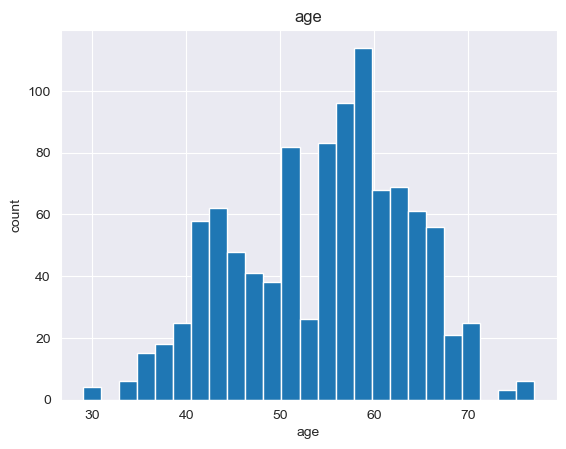

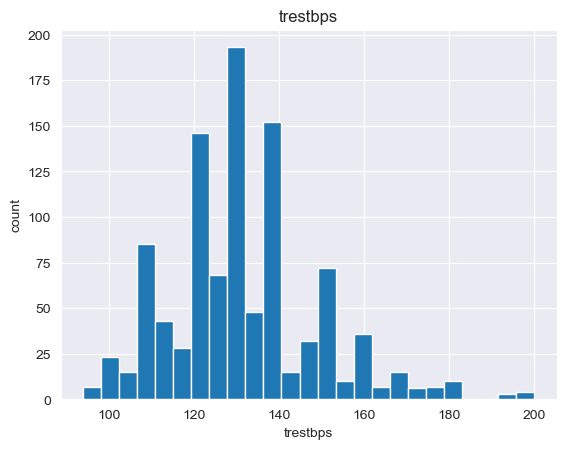

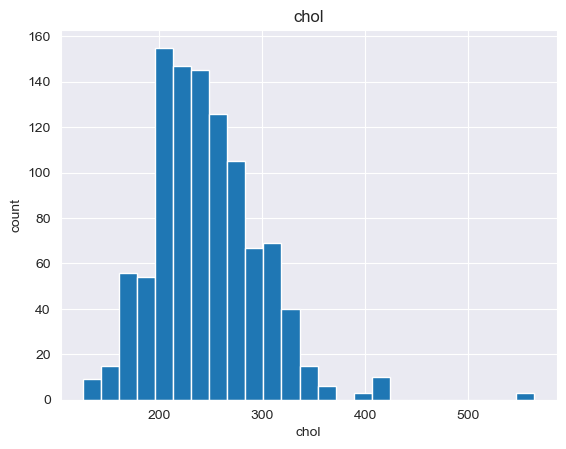

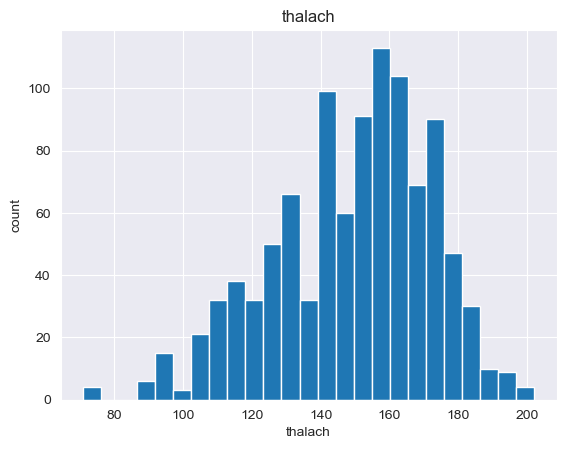

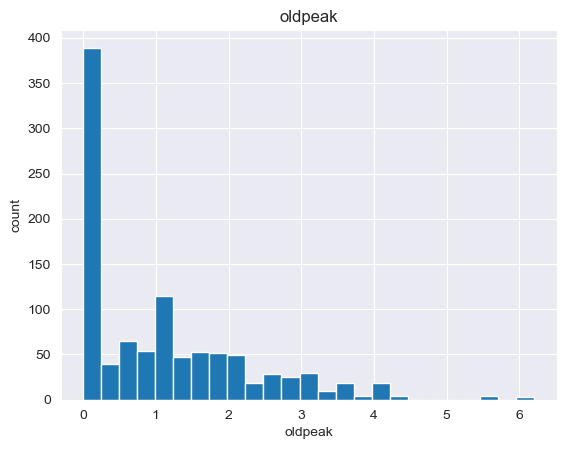

In [10]:
# lets analyse the continous values by creating histograms to understand the distribution of the data 

for features in continous_features:
    data = df.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

In [13]:
# Summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlations between the variable

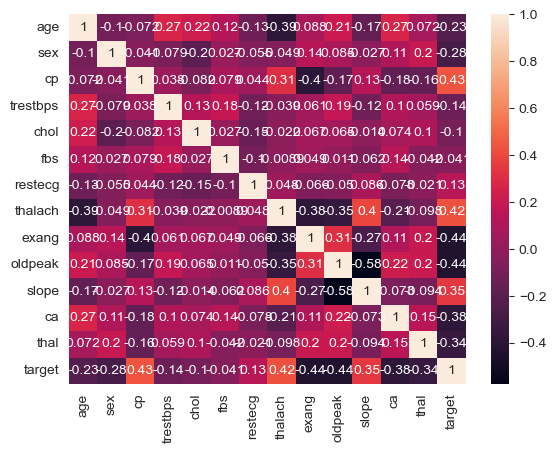

In [14]:
# Check correlation between variables
sns.heatmap(df.corr(), annot=True)
plt.show()

# Model building and selection

In [15]:
# Target variable
# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X = df.drop('target', axis=1)
y = df['target']

# Create train and test data set to generate accuracy.

In [18]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,  train_size=0.70)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Data classifying using Logistic Regression <br>

***It is used for two class-classification problem. It is a special case of linear regression where the target variable is categorical in nature. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.***

In [19]:
# Build Model
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.87


# Data classifying using Desicion Tree classifier
***The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.***

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#setting citeria: gini index
clf = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


# Data classifying using KNN classifier
***KNN classifier creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.***


In [22]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.74


# Data classification using Naive Bayes <br>

Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It works based on the Bayes theorem. The easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

In [23]:
# Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.84


# Classification summary

In [24]:
from sklearn.metrics import classification_report    
from sklearn.metrics import confusion_matrix    
from sklearn.metrics import accuracy_score    
pred = knn.predict(X_test)    
print(accuracy_score(y_test, pred))    
print(confusion_matrix(y_test, pred))    
print(classification_report(y_test, pred)) 

0.7435064935064936
[[114  31]
 [ 48 115]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       145
           1       0.79      0.71      0.74       163

    accuracy                           0.74       308
   macro avg       0.75      0.75      0.74       308
weighted avg       0.75      0.74      0.74       308



# Exercise

# The Haberman's Survival Dataset contains information about patients who had undergone breast cancer surgery, such as their age, year of surgery, and number of positive lymph nodes.

# The task is to predict whether a patient will survive for more than 5 years or not.

***Q1. Display the last five rows, info, summary, shape and classes of the haberman dataset***

***Q3. Find the number of counts in each class and plot it***

***Q3. Spilt the data into traning and testing and assigned the target value with test size as 0.3 and random state as 34***

***Q4. Find the classification accuarcy using kNN***

***Q5. Find the classification accuracy using Logistic Regression***

***Q6. Find the classification score using Naive bayes***

***Q7. Find the classification score using Decision Tree using information gain***